<a href="https://colab.research.google.com/github/VinayakDubey07/Deep-Learning-Concepts/blob/main/DL_3_Accuracy_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# loading the Fashion-MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# trimming the data since it takes lot of time
X_train_full = X_train_full[:30000]
y_train_full = y_train_full[:30000]
X_test = X_test[:5000]
y_test = y_test[:5000]
# scaling the dataset
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# dividing the dataset into training and validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train_full.shape

(30000, 28, 28)

In [ ]:
y_train_full.shape

(30000,)

In [ ]:
X_test.shape

(5000, 28, 28)

In [ ]:
y_test.shape

(5000,)

In [ ]:
X_train.shape

(25000, 28, 28)

In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, activation="relu"),
keras.layers.BatchNormalization(),
keras.layers.Dense(100, activation="relu"),
keras.layers.BatchNormalization(),
keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [ ]:
# checking model layer details
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
optimizer=keras.optimizers.SGD(lr=1e-3),
metrics=["accuracy"])

TO INCREASE ACCURACY , CHANGE THE EPOCHS FROM 5 TO 10 OR ANY VALUE BIGGER THAN 5


In [ ]:
history = model.fit(X_train, y_train, epochs=5,
validation_data=(X_valid, y_valid))



Epoch 1/5
782/782 [==============================] - 9s 8ms/step - loss: 0.6331 - accuracy: 0.7823 - val_loss: 0.4375 - val_accuracy: 0.8520
Epoch 2/5
782/782 [==============================] - 9s 12ms/step - loss: 0.4362 - accuracy: 0.8453 - val_loss: 0.3956 - val_accuracy: 0.8586
Epoch 3/5
782/782 [==============================] - 7s 8ms/step - loss: 0.3853 - accuracy: 0.8638 - val_loss: 0.3766 - val_accuracy: 0.8668
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.3577 - accuracy: 0.8701 - val_loss: 0.3705 - val_accuracy: 0.8690
Epoch 5/5
782/782 [==============================] - 8s 11ms/step - loss: 0.3301 - accuracy: 0.8810 - val_loss: 0.3573 - val_accuracy: 0.8754


ADDING BN BEFORE ACTIVATION



In [ ]:
model1 = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
keras.layers.BatchNormalization(),
keras.layers.Activation("elu"),
keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
keras.layers.BatchNormalization(),
keras.layers.Activation("elu"),
keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 300)               235200    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [ ]:
bn1 = model1.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

In [ ]:
# compiling the model
model1.compile(loss="sparse_categorical_crossentropy",
optimizer=keras.optimizers.SGD(lr=1e-3),
metrics=["accuracy"])

CHANGE EPOCHS HERE ALSO TO INCREAASE ACCURACY

In [ ]:
# training the model
history = model1.fit(X_train, y_train, epochs=5,
validation_data=(X_valid, y_valid))

Epoch 1/5
782/782 [==============================] - 9s 10ms/step - loss: 0.6760 - accuracy: 0.7698 - val_loss: 0.4842 - val_accuracy: 0.8352
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4930 - accuracy: 0.8258 - val_loss: 0.4394 - val_accuracy: 0.8460
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 0.4501 - accuracy: 0.8402 - val_loss: 0.4188 - val_accuracy: 0.8572
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.4231 - accuracy: 0.8513 - val_loss: 0.4137 - val_accuracy: 0.8520
Epoch 5/5
782/782 [==============================] - 9s 11ms/step - loss: 0.4018 - accuracy: 0.8562 - val_loss: 0.3930 - val_accuracy: 0.8678


In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8584


[0.39866024255752563, 0.8583999872207642]

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 1s 659ms/step


array([[4.71894100e-06, 1.33898575e-04, 1.88074664e-05, 3.22490341e-05,
        2.39534511e-05, 1.13260215e-02, 1.87080041e-05, 3.52768041e-02,
        4.75386449e-04, 9.52689469e-01],
       [5.60893677e-05, 4.86169592e-05, 9.96767879e-01, 8.70930307e-06,
        2.71788472e-03, 1.75817763e-06, 9.74998984e-05, 2.52507249e-04,
        3.22067390e-05, 1.69110117e-05],
       [6.82131358e-05, 9.99548137e-01, 2.57412194e-05, 9.24816195e-05,
        2.03680083e-05, 2.16262270e-05, 1.80150855e-05, 7.43872879e-05,
        1.24247556e-04, 6.86574822e-06]], dtype=float32)

In [ ]:
import numpy as np
predict_x=model.predict(X_new)
y_pred=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 107ms/step


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

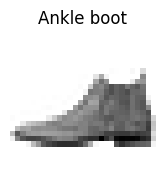

<Figure size 720x240 with 0 Axes>

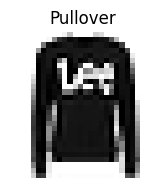

<Figure size 720x240 with 0 Axes>

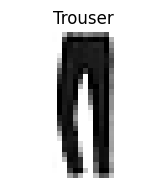

<Figure size 720x240 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
for index, image in enumerate (X_new):
 plt.subplot(1,3, index +1)
 plt.imshow(image, cmap="binary", interpolation="nearest")
 plt.axis('off')
 plt.title(class_names[y_test[index]], fontsize=12)
 plt.subplots_adjust(wspace=0.2, hspace=0.5)
 #save_fig('fashion_mnist_images_plot', tight_layout=False)
 plt.figure(figsize=(7.2,2.4))

 plt.show()